Importacion de librerias para poder extraer campos de csv

In [1]:
import pandas as pd
import numpy as np
# Convertir cadenas de texto en estructuras de datos 
import ast 
# Realizar analisis estadisticos
import matplotlib.pyplot as plt
# Para la realizacion de analisis de correlaciones
import seaborn as sns


In [2]:
#Leer el archivo CSV
file_path = r'C:\Users\walter\Desktop\N1_PI\PI_IRENE\Datos_originales\datos_originales\credits.csv'
df_credits = pd.read_csv(file_path)
    
# Mostrar las primeras filas del DataFrame para entender su estructura
print(df_credits.head())

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  


In [3]:

file_path = r'C:\Users\walter\Desktop\N1_PI\PI_IRENE\Datos_originales\datos_originales\movies_dataset.csv'
df = pd.read_csv(file_path)
    
# Mostrar las primeras filas del DataFrame para entender su estructura
print(df.head())


C:\Users\walter\AppData\Local\Temp\ipykernel_2312\2844223169.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

Desanidando y limpieza de datos crudos.

In [4]:
# Leer el archivo CSV movies_dataset.csv
file_path_movies = r'C:\Users\walter\Desktop\N1_PI\PI_IRENE\Datos_originales\datos_originales\movies_dataset.csv'
df_movies = pd.read_csv(file_path_movies)

# Leer el archivo CSV credits.csv
file_path_credits = r'C:\Users\walter\Desktop\N1_PI\PI_IRENE\Datos_originales\datos_originales\movies_dataset.csv'
df_credits = pd.read_csv(file_path_credits)

# Rellenar los valores nulos de las columnas 'revenue' y 'budget' en df_movies con 0
df_movies['revenue'].fillna(0, inplace=True)
df_movies['budget'].fillna(0, inplace=True)

# Asegurarse de que 'revenue' y 'budget' en df_movies sean numéricos
df_movies['revenue'] = pd.to_numeric(df_movies['revenue'], errors='coerce').fillna(0)
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce').fillna(0)

# Eliminar las filas con valores nulos en la columna 'release_date' en df_movies
df_movies.dropna(subset=['release_date'], inplace=True)

# Convertir las fechas a formato AAAA-mm-dd en df_movies
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Crear la columna 'release_year' en df_movies
df_movies['release_year'] = pd.to_datetime(df_movies['release_date'], errors='coerce').dt.year

# Crear la columna 'return' (evitando división por cero y valores faltantes) en df_movies
df_movies['return'] = df_movies.apply(lambda row: (row['revenue'] / row['budget']) if row['budget'] != 0 else 0, axis=1)
df_movies['return'].fillna(0, inplace=True)

# Eliminar las columnas especificadas en df_movies
columns_to_drop = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage']
df_movies.drop(columns_to_drop, axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame df_movies para verificar los cambios
print("Primeras filas del DataFrame df_movies después de rellenar valores nulos, eliminar columnas y formatear las fechas:")
print(df_movies.head())

# Mostrar las primeras filas del DataFrame df_credits para entender su estructura
print("\nPrimeras filas del DataFrame df_credits:")
print(df_credits.head())

# Alinear los índices de ambos DataFrames si es necesario
df_movies.reset_index(drop=True, inplace=True)
df_credits.reset_index(drop=True, inplace=True)

# Concatenar df_movies y df_credits para formar un solo DataFrame combinado
combined_df = pd.concat([df_movies, df_credits], axis=1)

# Mostrar el DataFrame combinado
print("\nDataFrame combinado:")
print(combined_df.head())


C:\Users\walter\AppData\Local\Temp\ipykernel_2312\3762838841.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv(file_path_movies)
C:\Users\walter\AppData\Local\Temp\ipykernel_2312\3762838841.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credits = pd.read_csv(file_path_credits)


Primeras filas del DataFrame df_movies después de rellenar valores nulos, eliminar columnas y formatear las fechas:
                               belongs_to_collection      budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1                                                NaN  65000000.0   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0.0   
3                                                NaN  16000000.0   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0.0   

                                              genres     id original_language  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862                en   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844                en   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602                en   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357                en   
4                     [{'id': 35, 'name': 'Comedy'}]  11862           

Proceso de EDA

In [5]:
# Verificar valores nulos en el DataFrame
nulos_por_columna = combined_df.isnull().sum()
    
#Mostrar los valores nulos por columna
print("Valores nulos por columna:")
print(nulos_por_columna)


Valores nulos por columna:
belongs_to_collection    40975
budget                      87
genres                      87
id                          87
original_language           98
overview                  1028
popularity                  89
production_companies        87
production_countries        87
release_date                90
revenue                     87
runtime                    336
spoken_languages            90
status                     170
tagline                  25068
title                       90
vote_average                90
vote_count                  90
release_year                90
return                      87
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path 

In [6]:
# Verificar duplicados 
duplicados = combined_df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [10]:

# Eliminar filas con cualquier valor nulo
combined_df_sin_nulos = combined_df.dropna()
    

In [11]:
# Verificar nuevamente los valores nulos después de eliminar
nulos_por_columna_despues = combined_df_sin_nulos.isnull().sum()
print("Valores nulos por columna en combined_df después de eliminar:")
print(nulos_por_columna_despues)


Valores nulos por columna en combined_df después de eliminar:
belongs_to_collection    0
budget                   0
genres                   0
id                       0
original_language        0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
vote_average             0
vote_count               0
release_year             0
return                   0
cast                     0
crew                     0
id                       0
dtype: int64


In [12]:
 # Verificar los tipos de datos en el DataFrame combinado
tipos_de_datos = combined_df.dtypes
print("Tipos de datos por columna en combined_df:")
print(tipos_de_datos)


Tipos de datos por columna en combined_df:
belongs_to_collection     object
budget                   float64
genres                    object
id                        object
original_language         object
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
release_year             float64
return                   float64
cast                      object
crew                      object
id                         int64
dtype: object


In [13]:

# Obtener un resumen estadístico de las columnas numéricas
resumen_estadistico = combined_df.describe()
print("Resumen estadístico de las columnas numéricas en combined_df:")
print(resumen_estadistico)

Resumen estadístico de las columnas numéricas en combined_df:
             budget       revenue       runtime  vote_average    vote_count  \
count  4.537900e+04  4.537900e+04  45130.000000  45376.000000  45376.000000   
mean   4.232325e+06  1.122936e+07     94.181675      5.624070    110.096439   
std    1.743932e+07  6.438789e+07     38.341059      1.915423    491.742894   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.000000      3.000000   
50%    0.000000e+00  0.000000e+00     95.000000      6.000000     10.000000   
75%    0.000000e+00  0.000000e+00    107.000000      6.800000     34.000000   
max    3.800000e+08  2.787965e+09   1256.000000     10.000000  14075.000000   

       release_year        return             id  
count  45376.000000  4.537900e+04   45476.000000  
mean    1991.881193  6.599991e+02  108345.997537  
std       24.055360  7.469083e+04  112443.796536  
min     1874.000000  0

In [7]:

# Estadísticas descriptivas de la columna 'budget'
estadisticas_budget = combined_df['budget'].describe()
print("Estadísticas descriptivas de 'budget':")
print(estadisticas_budget)

Estadísticas descriptivas de 'budget':
             budget
count  4.537900e+04
mean   4.232325e+06
std    1.743932e+07
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    3.800000e+08


In [8]:
# Estadísticas descriptivas de la columna 'revenue'
estadisticas_revenue = combined_df['revenue'].describe()
print("Estadísticas descriptivas de 'revenue': ")
print(estadisticas_revenue)
    

Estadísticas descriptivas de 'revenue': 
            revenue       revenue
count  4.537900e+04  4.546000e+04
mean   1.122936e+07  1.120935e+07
std    6.438789e+07  6.433225e+07
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00
max    2.787965e+09  2.787965e+09


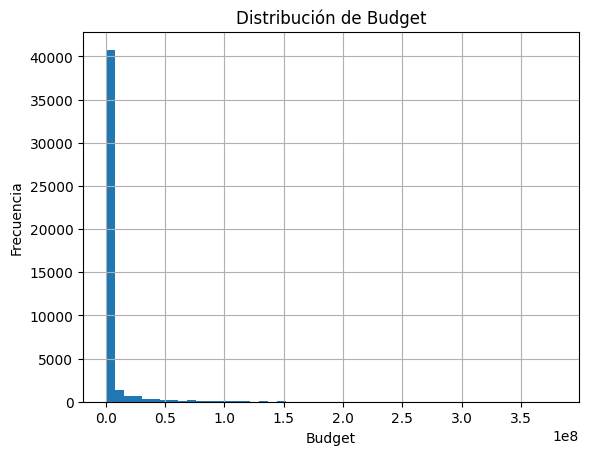

In [9]:
# Histograma de la columna 'budget'
combined_df['budget'].hist(bins=50)
plt.title('Distribución de Budget')
plt.xlabel('Budget')
plt.ylabel('Frecuencia')
plt.show()
    

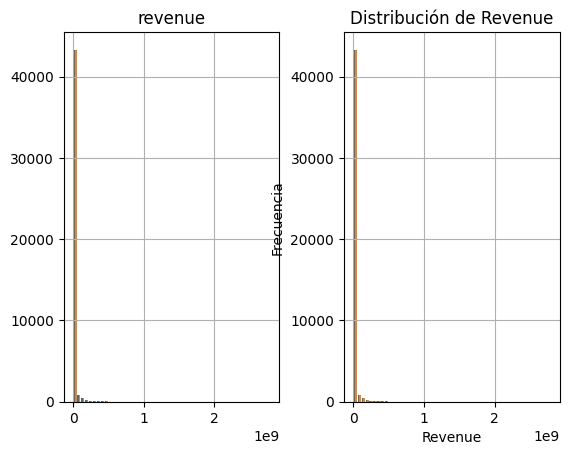

In [10]:
    
# Histograma de la columna 'revenue'
combined_df['revenue'].hist(bins=50)
plt.title('Distribución de Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
plt.show()

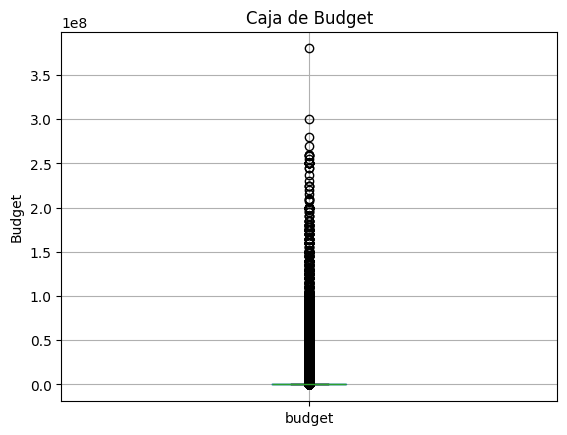

In [11]:
# Gráfico de caja de la columna 'budget'
combined_df.boxplot(column='budget')
plt.title('Caja de Budget')
plt.ylabel('Budget')
plt.show()

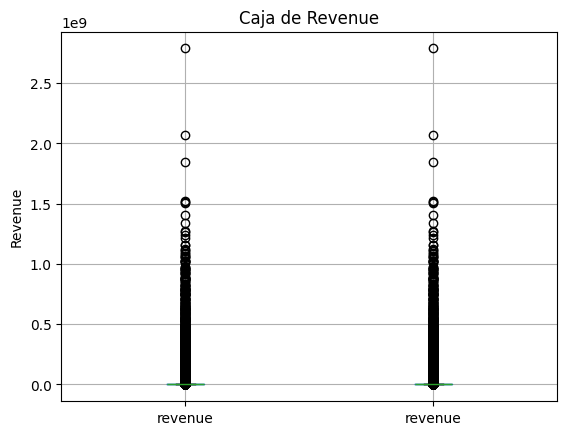

In [12]:
# Gráfico de caja de la columna 'revenue'
combined_df.boxplot(column='revenue')
plt.title('Caja de Revenue')
plt.ylabel('Revenue')
plt.show()



Por ultimo guardo en un archivo csv al df final

In [14]:
# Guardar el DataFrame combinado en un archivo CSV
output_file = r'C:\Users\walter\Desktop\N1_PI\PI_IRENE\ETL-EDA\data.csv'
combined_df.to_csv(output_file, index=False)

print(f"DataFrame combinado guardado en: {output_file}")


DataFrame combinado guardado en: C:\Users\walter\Desktop\N1_PI\PI_IRENE\ETL-EDA\data.csv
